In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import scipy.stats
%matplotlib inline
from sklearn.model_selection import train_test_split
#reading csv file
df = pd.read_csv('Campus_Selection.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [3]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [4]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [5]:
cat = [col for col in df.columns if df[col].dtypes == 'O']
cat

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [6]:
map = { 'Placed': 1 , 'Not Placed':0}
df['statusb'] = df['status'].replace(map)
df

C:\Users\mustafa\AppData\Local\Temp\ipykernel_2744\3456092510.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['statusb'] = df['status'].replace(map)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,statusb
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,1
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,1
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,1
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,1


In [7]:
y = df['statusb']
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: statusb, Length: 215, dtype: int64

In [8]:
X = df[numerical]
X

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,1,67.00,91.00,58.00,55.0,58.80
1,2,79.33,78.33,77.48,86.5,66.28
2,3,65.00,68.00,64.00,75.0,57.80
3,4,56.00,52.00,52.00,66.0,59.43
4,5,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49
211,212,58.00,60.00,72.00,74.0,53.62
212,213,67.00,67.00,73.00,59.0,69.72
213,214,74.00,66.00,58.00,70.0,60.23


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

Gaussian Naive Bayes model accuracy(in %): 80.23255813953489
========== Class 0 =========
mean =  [61.1341791  61.61283582]
cov =  [[39.91890194  0.        ]
 [ 0.         32.06899047]]
========== Class 1 =========
mean =  [68.74054054 62.57939189]
cov =  [[42.19839971  0.        ]
 [ 0.         34.39434085]]


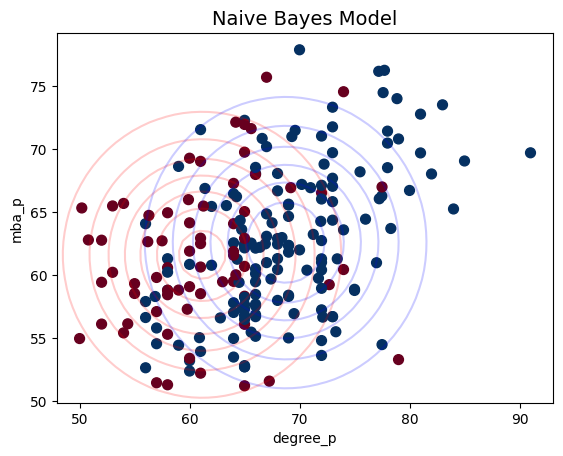

In [14]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

y_pred = gnb.predict(X_test) 

from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", 
      metrics.accuracy_score(y_test, y_pred)*100)  

def plot_naive_bayes(c, v, model, ax=None):
    X=c.to_numpy()
    y=v.to_numpy()    
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:, 3], X[:, 5], c=y, s=50, cmap='RdBu')
    ax.set_title('Naive Bayes Model', size=14)
    ax.set_xlabel('degree_p')
    ax.set_ylabel('mba_p')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xg = np.linspace(xlim[0], xlim[1], 60)
    yg = np.linspace(ylim[0], ylim[1], 40)
    xx, yy = np.meshgrid(xg, yg)
    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

    for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        mean2 = np.mean(X[mask], axis=0)
        o=[3,5]
        mean = mean2[o]
        std1 = np.std(X[mask, 3])
        std2 = np.std(X[mask, 5])
        cov = np.diag([np.square(std1), np.square(std2)])
        print("========== Class %.f =========" %label)
        print("mean = ", mean)
        print("cov = ", cov)
        dist = scipy.stats.multivariate_normal(mean=mean, cov=cov)
        P = dist.pdf(Xgrid)
        ax.contour(xx, yy, P.reshape(xx.shape),
                   colors=color, alpha=0.2)

    ax.set(xlim=xlim, ylim=ylim)

plot_naive_bayes(X, y, gnb)

========== Class 0 =========
mean =  [61.1341791  61.61283582]
cov =  [[ 8.65539555 40.52373379]
 [ 8.65539555 32.55488426]]
========== Class 1 =========
mean =  [68.74054054 62.57939189]
cov =  [[18.95153911 42.48546365]
 [18.95153911 34.62831595]]


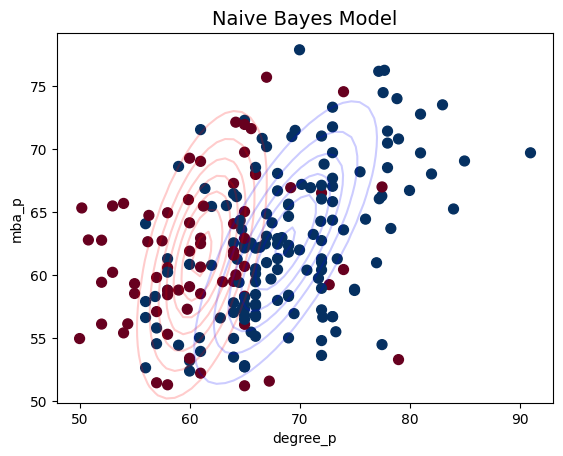

In [15]:
def plot_naive_bayes2(c, v, model, ax=None):
    X=c.to_numpy()
    y=v.to_numpy()    
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:,3], X[:,5], c=y, s=50, cmap='RdBu')
    ax.set_title('Naive Bayes Model', size=14)
    ax.set_xlabel('degree_p')
    ax.set_ylabel('mba_p')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xg = np.linspace(xlim[0], xlim[1], 60)
    yg = np.linspace(ylim[0], ylim[1], 40)
    xx, yy = np.meshgrid(xg, yg)
    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
 
   
    for label, color in enumerate(['red', 'blue']):
        mask = (y == label)
        mean1 = np.mean(X[mask], axis=0)
        cov1 = np.cov(X[mask].T)  # Estimate covariance for each class
        o=[3,5]
        v=[(3,3),(3,5)],[(5,3),(5,5)] #gets cov of features 3 with 5 from cov matrix
        cov=cov1[v]
        mean=mean1[o]
        print("========== Class %.f =========" %label)
        print("mean = ", mean)
        print("cov = ", cov)
        dist = scipy.stats.multivariate_normal(mean=mean, cov=cov)
        P = dist.pdf(Xgrid)
        ax.contour(xx, yy, P.reshape(xx.shape),
                   colors=color, alpha=0.2)

    ax.set(xlim=xlim, ylim=ylim)

plot_naive_bayes2(X, y, gnb)

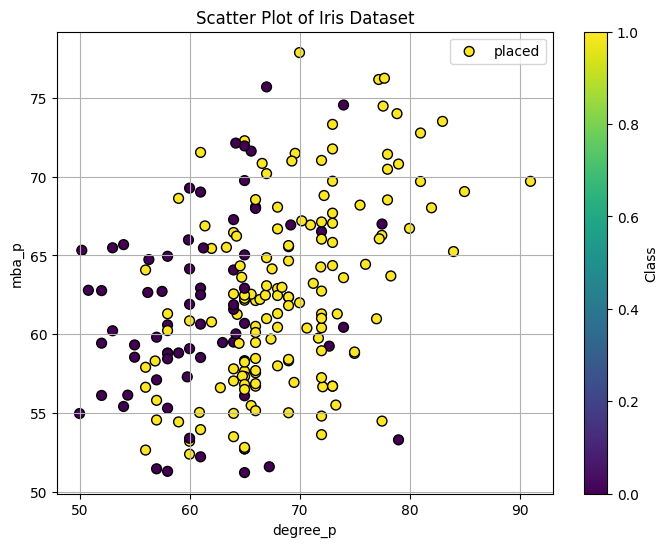

Best number of neighbors (k): 17
Accuracy: 0.7558139534883721


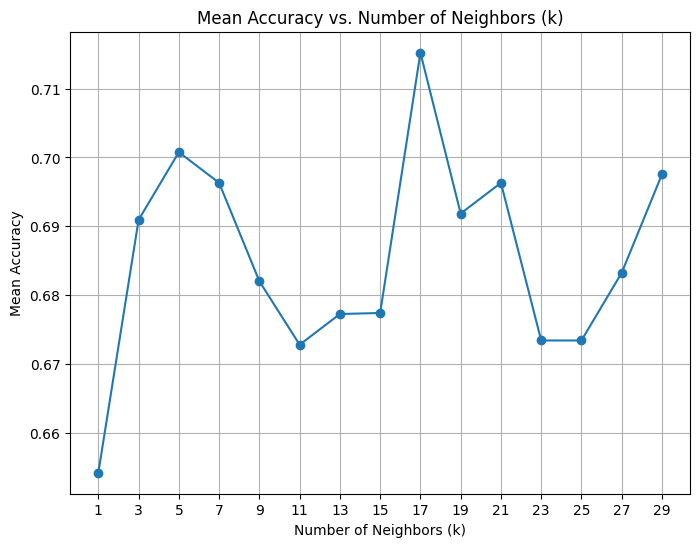

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

X1=X.to_numpy()
y1=y.to_numpy() 

# Step 2: Initialize parameters
neighbors = list(range(1, 30, 2))  # Only odd values of k from 1 to 29

# Step 3: Perform 7-fold cross-validation
mean_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X1, y1, cv=7, scoring='accuracy')  # 7-fold cross-validation
    mean_scores.append(np.mean(scores))


plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 3], X1[:, 5], c=y1, cmap='viridis', s=50, edgecolors='k')
plt.title('Scatter Plot of Iris Dataset')
plt.xlabel('degree_p')
plt.ylabel('mba_p')
plt.legend(['placed'])
plt.colorbar(label='Class')
plt.grid(True)
plt.show()



# Step 5: Select best number of neighbors
best_k = neighbors[np.argmax(mean_scores)]
print("Best number of neighbors (k):", best_k)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Step 6: Predict labels for the dataset
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Plot the mean scores
plt.figure(figsize=(8, 6))
plt.plot(neighbors, mean_scores, marker='o')
plt.title('Mean Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()
